# Description

&emsp;Nous voulons connaître si une personne possède un compte bancaire ou non en utilisant des données anonymisées provenant de quatre pays d'Afrique de l'Est : le Kenya, le Rwanda, la Tanzanie et l'Ouganda. L’ensemble de données principal contient des informations démographiques et quels services financiers sont utilisés par environ 33 600 personnes à travers l’Afrique de l’Est. Ces données ont été extraites de diverses enquêtes Finscope allant de 2016 à 2018.
<br><br>
&emsp;Ce problème peut être considérer comme un problème de classification ce qui peut être résolu avec des algorithmes de machine learning. Notre but est donc de développer un modèle capable de prédire la probabilité qu'une personne possède un compte bancaire (Oui = 1, Non = 0)

# Evaluation

Pour mesurer la performance du modèle nous mesurerons la précision qui mesure la proportion de prédictions positives qui sont réellement correctes.


# Exploratory Data Analysis

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

warnings.simplefilter("ignore")
sns.set_style("whitegrid")

In [19]:
data = "data/"

train = pd.read_csv(data+'Train.csv')
test = pd.read_csv(data+'Test.csv')
ss = pd.read_csv(data+'SampleSubmission.csv')
variables = pd.read_csv(data+'VariableDefinitions.csv')

df = train.copy()

Observons la forme de notre tableau.

In [20]:
df.shape

(23524, 13)

On va anaylser un tableau avec 23524 observations et 13 variables.

In [21]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Ci-dessus, on a un aperçu du contenu du tableau.

In [22]:
variables

,Variable,Definitions
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


Ci-dessus, les descriptions des diverses variables de notre tableau.

In [23]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

On constate que notre tableau ne possède aucune valeur manquante.

In [30]:
df.dtypes.value_counts()

object    10
int64      3
dtype: int64

Parmis les variables dans notre tableau, 10 d'entre elles sont des variables catégoriques et 3 sont des variables numériques.

Notre modèle aura pour objectif de prédire, pour chaque individu, la valeur de la variable *bank_account*, qui indique si l'individu possède un compte bancaire.

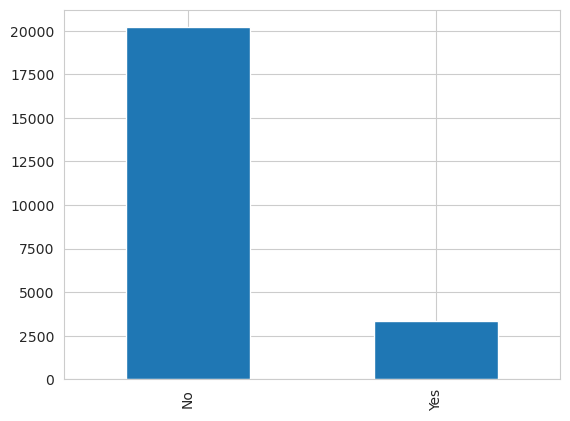

In [67]:
df["bank_account"].value_counts().plot.bar();

La répartition de nos observations entre les deux valeurs de la variable *bank_account* est observée ci-dessus. On remarque que la distribution est déséquilibrée et les individus ne possédant pas de compte bancaire sont plus représentés. 

## Variables Numériques

In [35]:
df.select_dtypes(np.number).columns.tolist()

['year', 'household_size', 'age_of_respondent']

Voici donc les variables numériques de notre tableau. On remarque que la variable *year* représente l'année de l'observation et qu'on devra l'analyser séparément.

In [36]:
num_cols = ['household_size', 'age_of_respondent']
df[num_cols].describe()

,household_size,age_of_respondent
count,23524.000000,23524.000000
mean,3.797483,38.805220
std,2.227613,16.520569
min,1.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


Ci-dessus, on observe les statistiques des variables *household_size* et *age_of_respondent*.

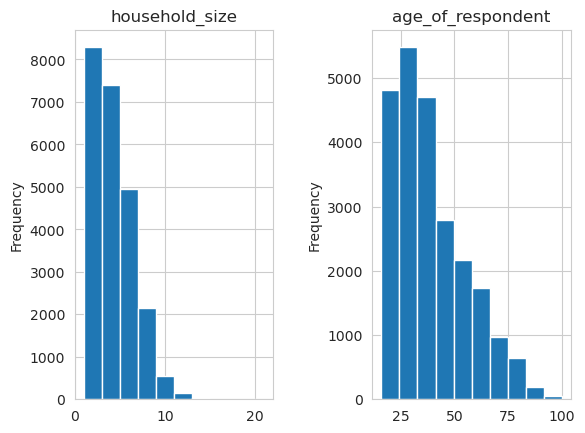

In [48]:
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
df['household_size'].plot.hist()
plt.title('household_size');

plt.subplot(1,2,2)
df['age_of_respondent'].plot.hist()
plt.title('age_of_respondent');

Les deux variables présentent des distributions asymétriques à droite, sans tellement de valeurs extrèmes.

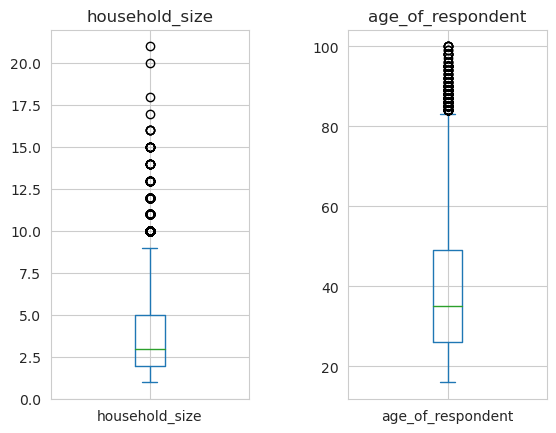

In [49]:
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
df['household_size'].plot.box()
plt.title('household_size');

plt.subplot(1,2,2)
df['age_of_respondent'].plot.box()
plt.title('age_of_respondent');

Le diagramme en boîte (boxplot) des deux variables montre la présence de quelques valeurs aberrantes, mais dont les valeurs restent relativement modérées.

In [56]:
df_yes = df[df['bank_account'] == "Yes"]
df_no = df[df['bank_account'] == "No"]

In [71]:
df_yes[num_cols].describe()

,household_size,age_of_respondent
count,3312.000000,3312.000000
mean,3.641606,39.598128
std,2.178225,14.330420
min,1.000000,16.000000
25%,2.000000,29.000000
50%,3.000000,36.000000
75%,5.000000,48.000000
max,17.000000,95.000000


Ci-dessus, on observe les statistiques des variables *household_size* et *age_of_respondent* pour les individus avec compte bancaire.

In [74]:
df_no[num_cols].describe()

,household_size,age_of_respondent
count,20212.000000,20212.000000
mean,3.823026,38.675292
std,2.234618,16.849093
min,1.000000,16.000000
25%,2.000000,25.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


Ci-dessus, on observe les statistiques des variables *household_size* et *age_of_respondent* pour les individus sans compte bancaire.

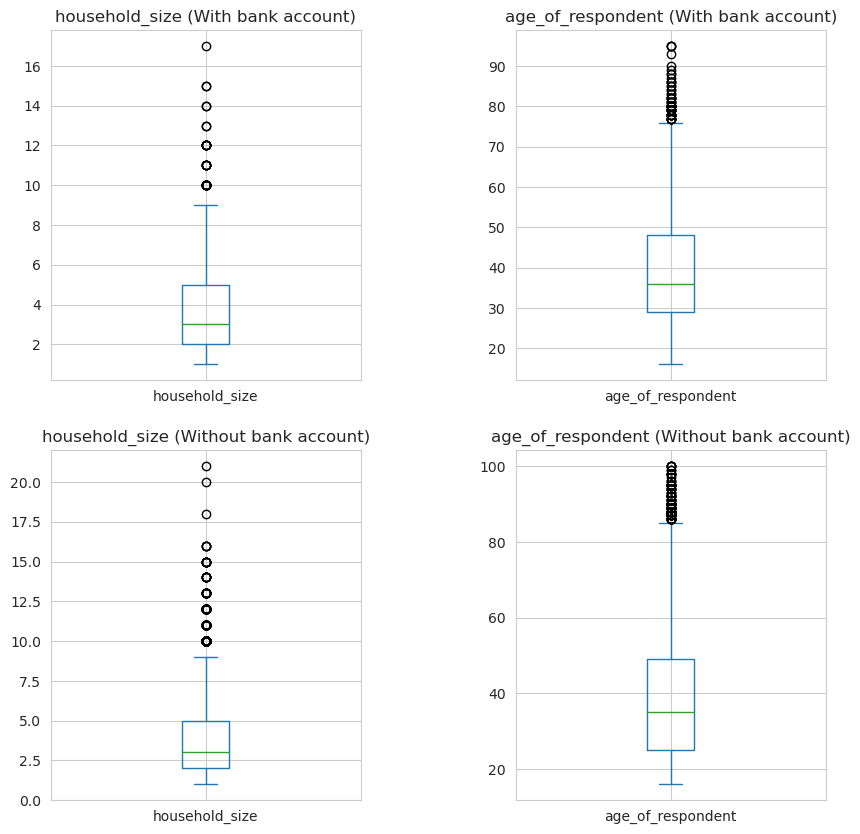

In [69]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.5)

plt.subplot(2,2,1)
df_yes['household_size'].plot.box()
plt.title('household_size (With bank account)');

plt.subplot(2,2,2)
df_yes['age_of_respondent'].plot.box()
plt.title('age_of_respondent (With bank account)');

plt.subplot(2,2,3)
df_no['household_size'].plot.box()
plt.title('household_size (Without bank account)');

plt.subplot(2,2,4)
df_no['age_of_respondent'].plot.box()
plt.title('age_of_respondent (Without bank account)');

En jetant un œil aux statistiques, le diagramme en boîte des deux variables entre les valeurs de *bank_account* ne démontre aucune différence significative.

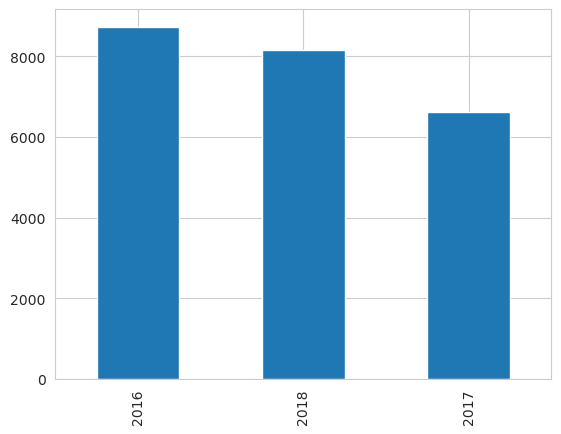

In [78]:
df['year'].value_counts().plot.bar();

Les observations sont réparties de manière assez équitable entre les années 2016, 2017 et 2018.

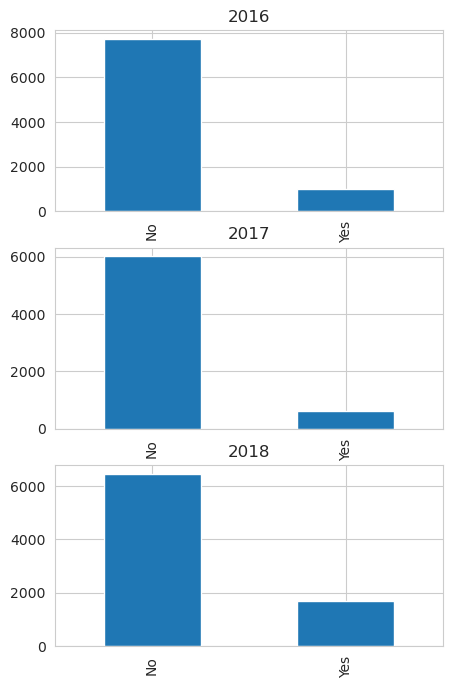

In [84]:
plt.figure(figsize=(5, 8))
plt.subplot(3,1,1)
df[df['year'] == 2016]["bank_account"].value_counts().plot.bar()
plt.title("2016")
plt.subplot(3,1,2)
df[df['year'] == 2017]["bank_account"].value_counts().plot.bar()
plt.title("2017")
plt.subplot(3,1,3)
df[df['year'] == 2018]["bank_account"].value_counts().plot.bar()
plt.title("2018");

On constate peu de différences entre les valeurs de *bank_account* sur les différentes années.

## Variables Catégoriques

In [86]:
df.select_dtypes("O").describe()

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


On retirera la variable *unique_id* de la liste des variables catégoriques à analyser pour la suite, car elle ne risque pas de contenir des informations à propos de la cible.

In [87]:
cat_cols = df.select_dtypes("O").drop(columns="uniqueid").columns

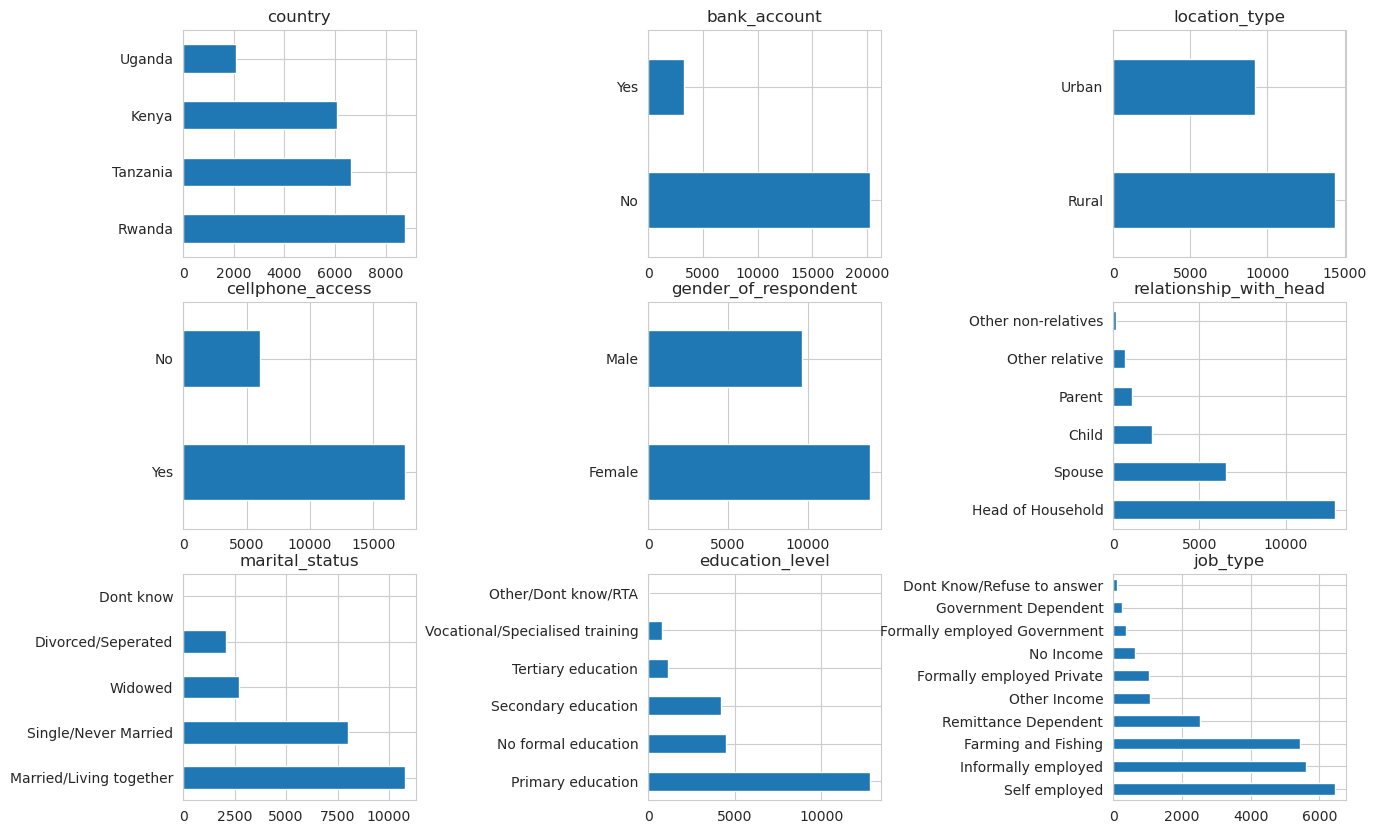

In [94]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=1)

i = 1
for col in cat_cols:
    plt.subplot(3,3,i);i+=1
    df[col].value_counts().plot.barh()
    plt.title(col)

On peut observer ci-dessus la répartition des observations entre les diverses classes. On constate que certains d'entre eux sont déséquilibrées.

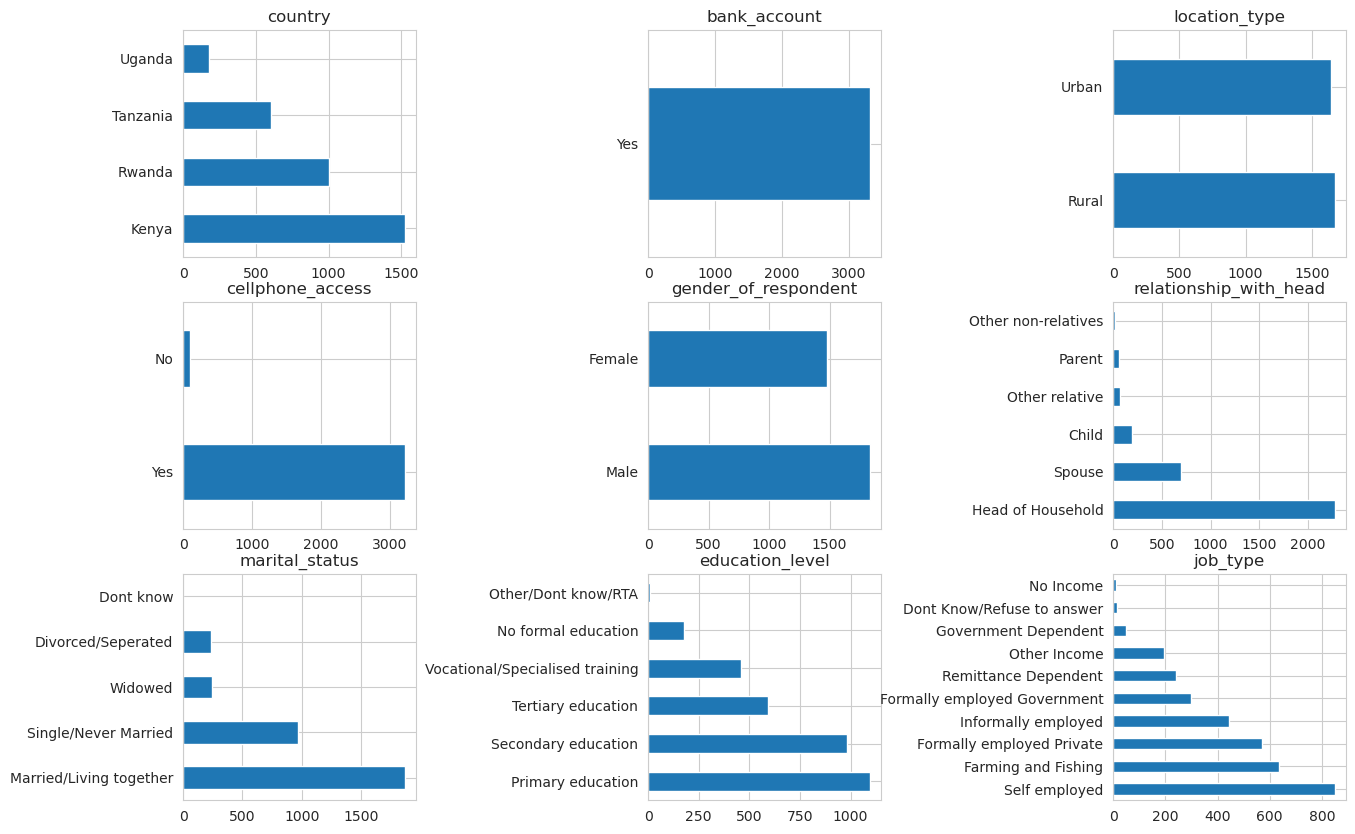

In [95]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=1)

i = 1
for col in cat_cols:
    plt.subplot(3,3,i);i+=1
    df_yes[col].value_counts().plot.barh()
    plt.title(col)

On peut observer ci-dessus la répartition des observations entre les diverses classes pour les individus ayant des comptes bancaires.

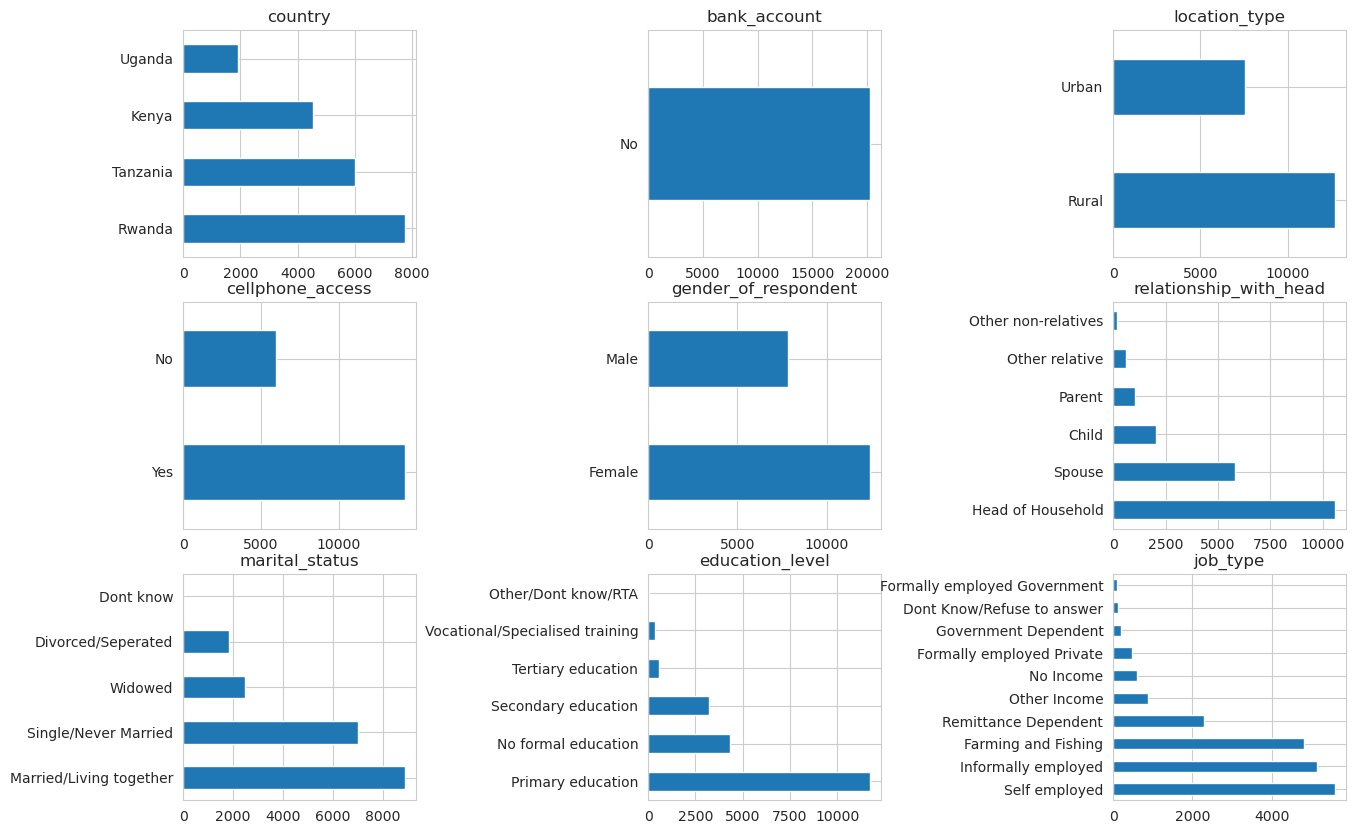

In [96]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=1)

i = 1
for col in cat_cols:
    plt.subplot(3,3,i);i+=1
    df_no[col].value_counts().plot.barh()
    plt.title(col)

On peut observer ci-dessus la répartition des observations entre les diverses classes pour les individus n'ayant pas de compte bancaire.

# Model

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import Binarizer, OneHotEncoder
from sklearn.pipeline

In [103]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
df['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = df.drop(['bank_account'], axis=1)
y_train = df['bank_account']


# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data   


# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

In [108]:
model = LogisticRegression()

#fitting the models
model.fit(X_Train,y_Train)
# import evaluation metrics
from sklearn.metrics import accuracy_score

# evaluate the model
pmodel = model.predict(X_Val)

# Get error rate
print("Error rate Logistic Regression: ", 1 - accuracy_score(y_val, pmodel))

Error rate Logistic Regression:  0.11219719507012327
